# Decision Trees

- Decision tree fitting
- Visualization
- Metrics
- Parameters

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns
from math import sqrt
%matplotlib inline

## Import data

In [2]:
# Import data from URL and add column names
auto_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', 
                      header = None, na_values = '?')

auto_df.columns = [
 'symboling'
 ,'normalized-losses'
 ,'make'
 ,'fuel-type'
 ,'aspiration'
 ,'num-of-doors'
 ,'body-style'
 ,'drive-wheels'
 ,'engine-location'
 ,'wheel-base'
 ,'length'
 ,'width'
 ,'height'
 ,'curb-weight'
 ,'engine-type'
 ,'num-of-cylinders'
 ,'engine-size'
 ,'fuel-system'
 ,'bore'
 ,'stroke'
 ,'compression-ratio'
 ,'horsepower'
 ,'peak-rpm'
 ,'city-mpg'
 ,'highway-mpg'
 , 'price'
]

In [3]:
# Top 5 rows to get a sense of what the data looks like
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
germans = ['volkswagen', 'audi', 'bmw', 'mercedes-benz', 'porsche']

In [5]:
keep_features = [
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'curb-weight',
 'num-of-cylinders',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price'
]

In [6]:
labels = auto_df[auto_df['make'].isin(germans)]['make']
features = auto_df[auto_df['make'].isin(germans)][keep_features]

In [7]:
features.shape, labels.shape

((40, 12), (40,))

## initial viz

In [8]:
features.describe()

,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,40.000000,40.000000,40.000000,40.000000,40.000000,38.000000
mean,2879.600000,128.825000,5143.750000,21.625000,27.225000,21889.815789
std,538.360703,49.506222,553.449266,6.104591,7.047413,11084.045736
min,2209.000000,52.000000,4250.000000,14.000000,16.000000,7775.000000
25%,2380.500000,97.500000,4500.000000,17.000000,23.500000,12541.250000
50%,2771.500000,121.000000,5400.000000,20.500000,25.000000,19945.000000
75%,3369.500000,156.250000,5500.000000,24.000000,29.250000,31390.000000
max,3900.000000,288.000000,5900.000000,37.000000,46.000000,45400.000000


### Data cleaning

In [9]:
features.isna().sum()

fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
curb-weight         0
num-of-cylinders    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               2
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

In [12]:
features['price']  = imputer.fit_transform(features[['price']])

In [13]:
features.shape

(40, 12)

In [14]:
features.dtypes

fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
curb-weight           int64
num-of-cylinders     object
horsepower          float64
peak-rpm            float64
city-mpg              int64
highway-mpg           int64
price               float64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
feature_dummies = pd.get_dummies(features)

In [17]:
feature_dummies.head()

,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,...,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six
3,2337,102.0,5500.0,24,30,13950.0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,2824,115.0,5500.0,18,22,17450.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
5,2507,110.0,5500.0,19,25,15250.0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
6,2844,110.0,5500.0,19,25,17710.0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7,2954,110.0,5500.0,19,25,18920.0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0


## Preparing our data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(feature_dummies, labels, test_size=0.30, random_state=202)

In [19]:
X_train.shape

(28, 24)

In [20]:
X_test.shape

(12, 24)

In [21]:
y_test

16               bmw
191       volkswagen
8               audi
187       volkswagen
127          porsche
185       volkswagen
189       volkswagen
5               audi
70     mercedes-benz
3               audi
126          porsche
13               bmw
Name: make, dtype: object

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [23]:
clf = DecisionTreeClassifier()

In [24]:
clf = clf.fit(X_train, y_train)

### Visualization
Usuing graphviz https://graphviz.org/download/

In [25]:
# ! pip install graphviz 
#!conda install python-graphviz

In [26]:
# Windows
# set option to ad graphviz to PATH

# Mac
# brew install graphviz

# Linux
# sudo apt-get install graphviz

In [25]:
import graphviz

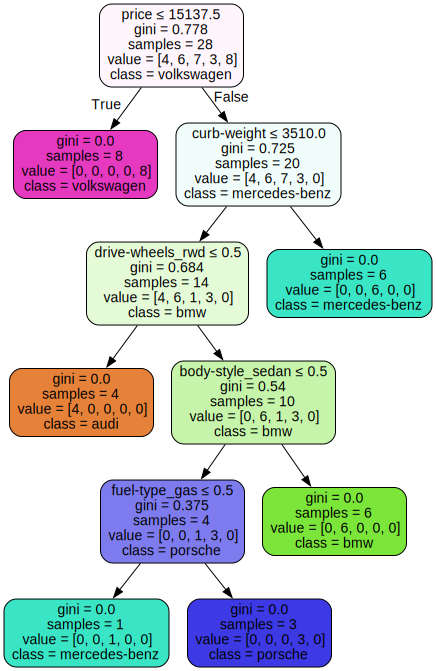

In [26]:
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=feature_dummies.columns,  
                     class_names=labels.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph

## Metrics

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [28]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_pred

array(['bmw', 'volkswagen', 'audi', 'volkswagen', 'porsche', 'volkswagen',
       'volkswagen', 'audi', 'mercedes-benz', 'volkswagen', 'porsche',
       'bmw'], dtype=object)

In [31]:
accuracy_score(y_pred, y_test)

0.9166666666666666

In [32]:
print(classification_report(y_pred, y_test))

               precision    recall  f1-score   support

         audi       0.67      1.00      0.80         2
          bmw       1.00      1.00      1.00         2
mercedes-benz       1.00      1.00      1.00         1
      porsche       1.00      1.00      1.00         2
   volkswagen       1.00      0.80      0.89         5

     accuracy                           0.92        12
    macro avg       0.93      0.96      0.94        12
 weighted avg       0.94      0.92      0.92        12



Confusion matrix, without normalization
[[2 0 0 0 1]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 4]]


<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

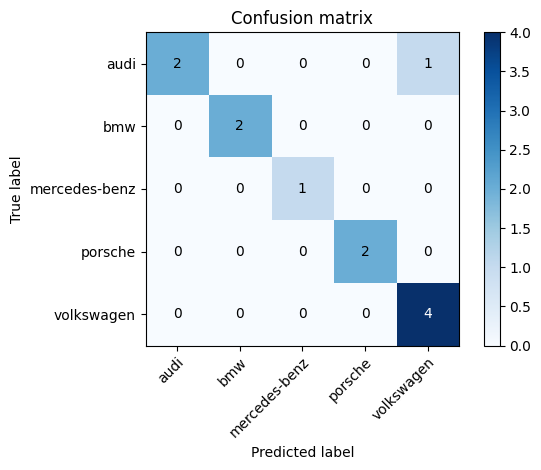

In [33]:
plot_confusion_matrix(y_true=y_test, y_pred=y_pred,
                      title='Confusion matrix')

In [34]:
pd.DataFrame({'Actual': y_test,'Predictions': y_pred})

,Actual,Predictions
16,bmw,bmw
191,volkswagen,volkswagen
8,audi,audi
187,volkswagen,volkswagen
127,porsche,porsche
185,volkswagen,volkswagen
189,volkswagen,volkswagen
5,audi,audi
70,mercedes-benz,mercedes-benz
3,audi,volkswagen


## Hyperparameters
- Max depth
- Max features
    - auto
    - sqrt
    - log2
    - int
    - float
- Min Samples split
- Min samples leaf


In [35]:
clf = DecisionTreeClassifier(max_depth=5)

In [36]:
clf = clf.fit(X_train, y_train)

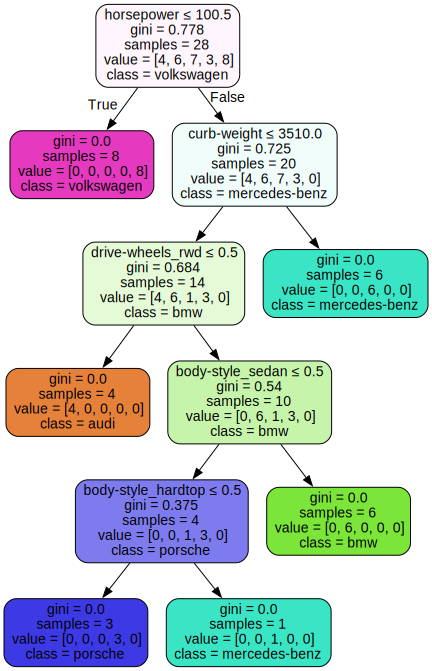

In [37]:
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=feature_dummies.columns,  
                     class_names=labels.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [38]:
y_pred = clf.predict(X_test)

Confusion matrix, without normalization
[[3 0 0 0 0]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [0 0 2 0 0]
 [1 0 0 0 3]]


<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

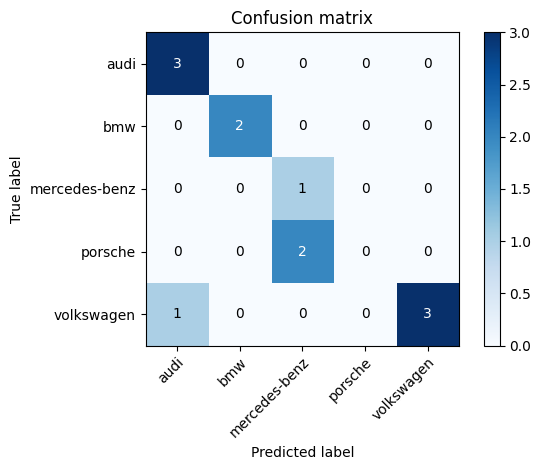

In [39]:
plot_confusion_matrix(y_true=y_test, y_pred=y_pred,
                      title='Confusion matrix')